In [39]:
# Set dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

#time series 
# Start = YYYY-MM-DD
# End = YYYY-MM-DD

#Url_Setup for BPI
base_url = "https://api.coindesk.com/v1/bpi/historical/close.json?"
Start = '2020-11-02'
End = '2020-11-10'
query_url = f'{base_url}start={Start}&end={End}'


pprint(requests.get(query_url).json())

#Data set up for Dow Jones during Election (11-2 - 11/10)
# Read CSV
dow_data = pd.read_csv("data/dow.csv")
dow_data.rename(columns = {'DATE':'Date', 'Close': 'Dow Close'}, inplace = True)
dow_data = dow_data[['Date','Dow Close']]
dow_data


#Data for Gold (11-2 - 11/10)
gold_data = pd.read_csv("data/gold.csv")
gold_data_df = pd.DataFrame(gold_data)
gold_data_df.columns = gold_data_df.columns.tolist()[:1] + ['Close'] + gold_data_df.columns.tolist()[2:]
gold_data_df['Date'] = pd.to_datetime(gold_data_df['Date'])
gold_data_df.rename(columns = {'Close': 'Gold Close'}, inplace = True)
gold_data_df = gold_data_df[['Date','Gold Close']]
gold_data_df 



{'bpi': {'2020-11-02': 13567.2233,
         '2020-11-03': 14030.79,
         '2020-11-04': 14158.81,
         '2020-11-05': 15593.555,
         '2020-11-06': 15589.0033,
         '2020-11-07': 14843.945,
         '2020-11-08': 15489.47,
         '2020-11-09': 15334.87,
         '2020-11-10': 15313.4433},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index. '
               'BPI value data returned as USD.',
 'time': {'updated': 'Nov 11, 2020 00:03:00 UTC',
          'updatedISO': '2020-11-11T00:03:00+00:00'}}


,Date,Gold Close
0,2021-01-14,1851.4
1,2021-01-13,1854.9
2,2021-01-12,1844.2
3,2021-01-11,1850.8
4,2021-01-08,1835.4
...,...,...
1255,2016-01-22,1096.3
1256,2016-01-21,1098.2
1257,2016-01-20,1106.2
1258,2016-01-19,1089.1


In [43]:
#response get for BPI
response = requests.get(query_url).json()
my_dict = response['bpi']
test_df= pd.DataFrame(list(my_dict.items()),columns=['close date','close price'])
test_df['close price'] = test_df['close price'].round(2)
test_df.rename(columns = {'close date':'Date','close price':'Bitcoin Close'}, inplace = True)
test_df

# # #Combine DF for Dow and BPI
combined_DowBPI_data = pd.merge(test_df, dow_data, on="Date", how="outer")
clean_combined = combined_DowBPI_data.dropna()
# clean_combined['Dow Close'] = clean_combined['Dow Close'].round(2)
clean_combined

combined_DowBPIGold_data = pd.merge(clean_combined, gold_data, on="Date", how="outer")
combined_DowBPIGold_data


##Dow and Gold was closed on the weekend

,Date,Bitcoin Close,Dow Close
0,2020-11-02,13567.22,26925.050781
1,2020-11-03,14030.79,27480.029297
2,2020-11-04,14158.81,27847.660156
3,2020-11-05,15593.56,28390.179688
4,2020-11-06,15589.00,28323.400391
7,2020-11-09,15334.87,29157.970703
8,2020-11-10,15313.44,29420.919922


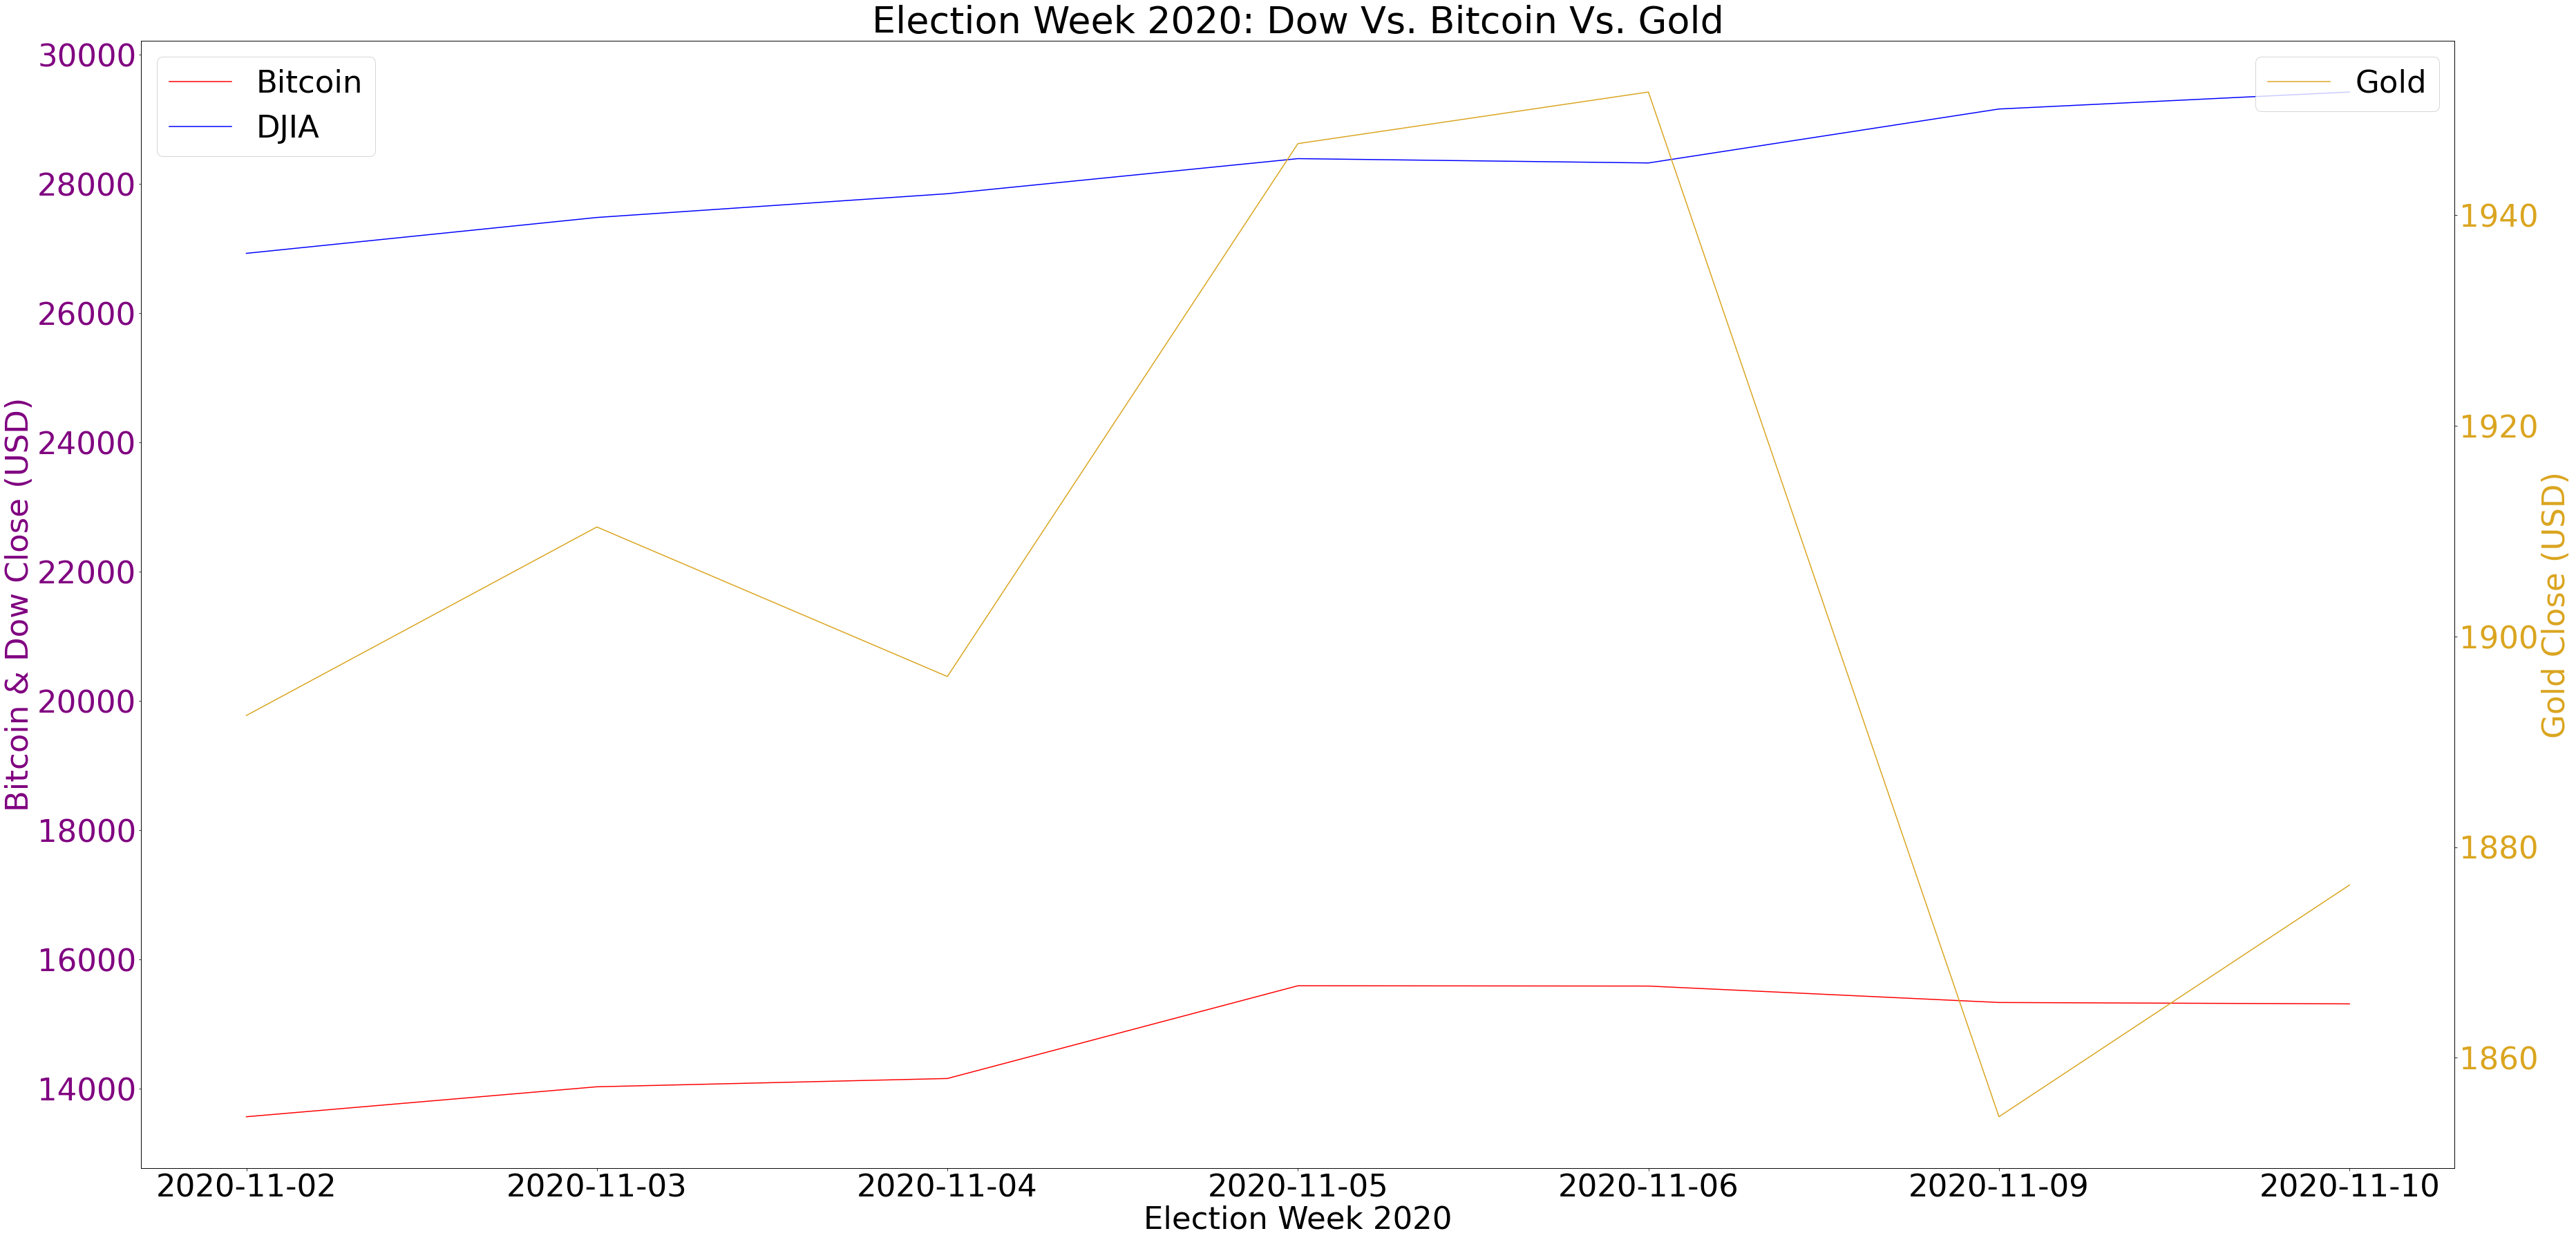

In [23]:
#Better Chart with 2 axis 
fig, ax1 = plt.subplots()
color_bit ='red'
color_dow = 'blue'
color_gold = 'goldenrod'
color_label = 'purple'
ax1.set_xlabel('Election Week 2020')
ax1.set_ylabel('Bitcoin & Dow Close (USD)', color =color_label)
ax1.plot(clean_combined['close date'], clean_combined['Bitcoin Close'], color=color_bit, Label='Bitcoin')
ax1.plot(clean_combined['close date'],clean_combined['DJIA'],color=color_dow, Label='DJIA')
ax1.tick_params(axis='y', labelcolor=color_label)

ax2=ax1.twinx()

ax2.set_ylabel('Gold Close (USD)', color =color_gold)
ax2.plot(combined_DowBPIGold_data['close date'],combined_DowBPIGold_data['Gold Price'],color=color_gold, Label='Gold')
ax2.tick_params(axis='y', labelcolor=color_gold)

#Title Clean up
plt.title("Election Week 2020: Dow Vs. Bitcoin Vs. Gold")
plt.rcParams["figure.figsize"] = (60,30)
plt.rcParams.update({'font.size': 45})

#Legend Clean up


ax1.legend(loc=0)
ax2.legend(loc=0)

plt.show()



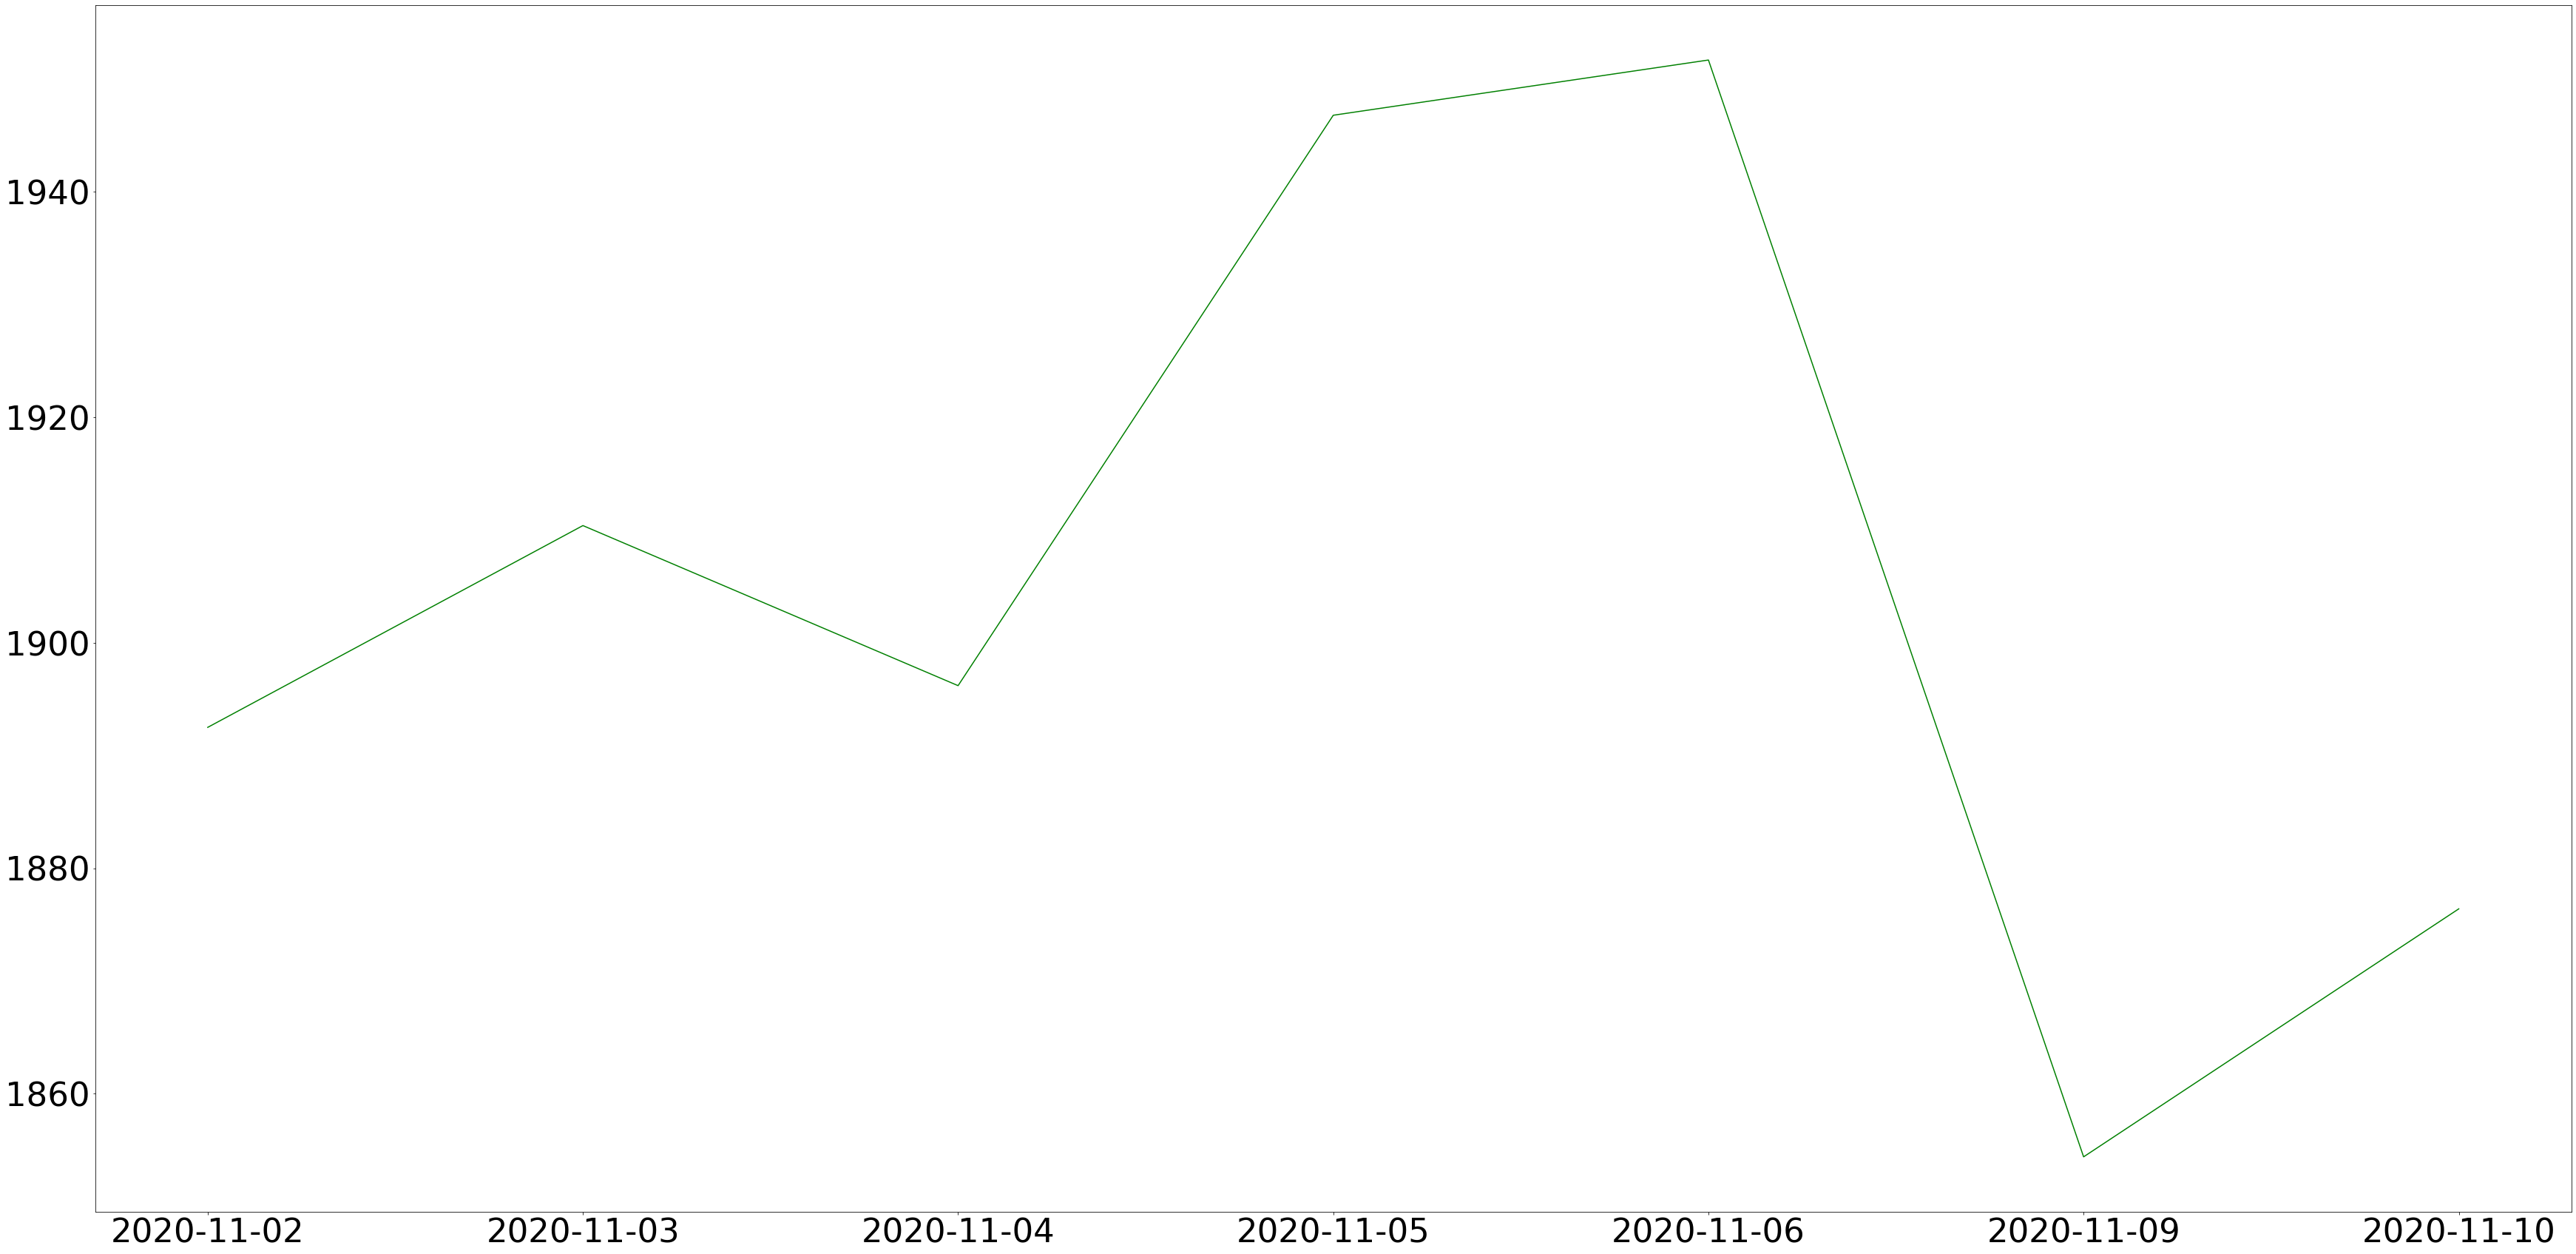

In [13]:
Gold = plt.plot(combined_DowBPIGold_data['close date'], combined_DowBPIGold_data['Gold Price'], color="green", label="Gold")

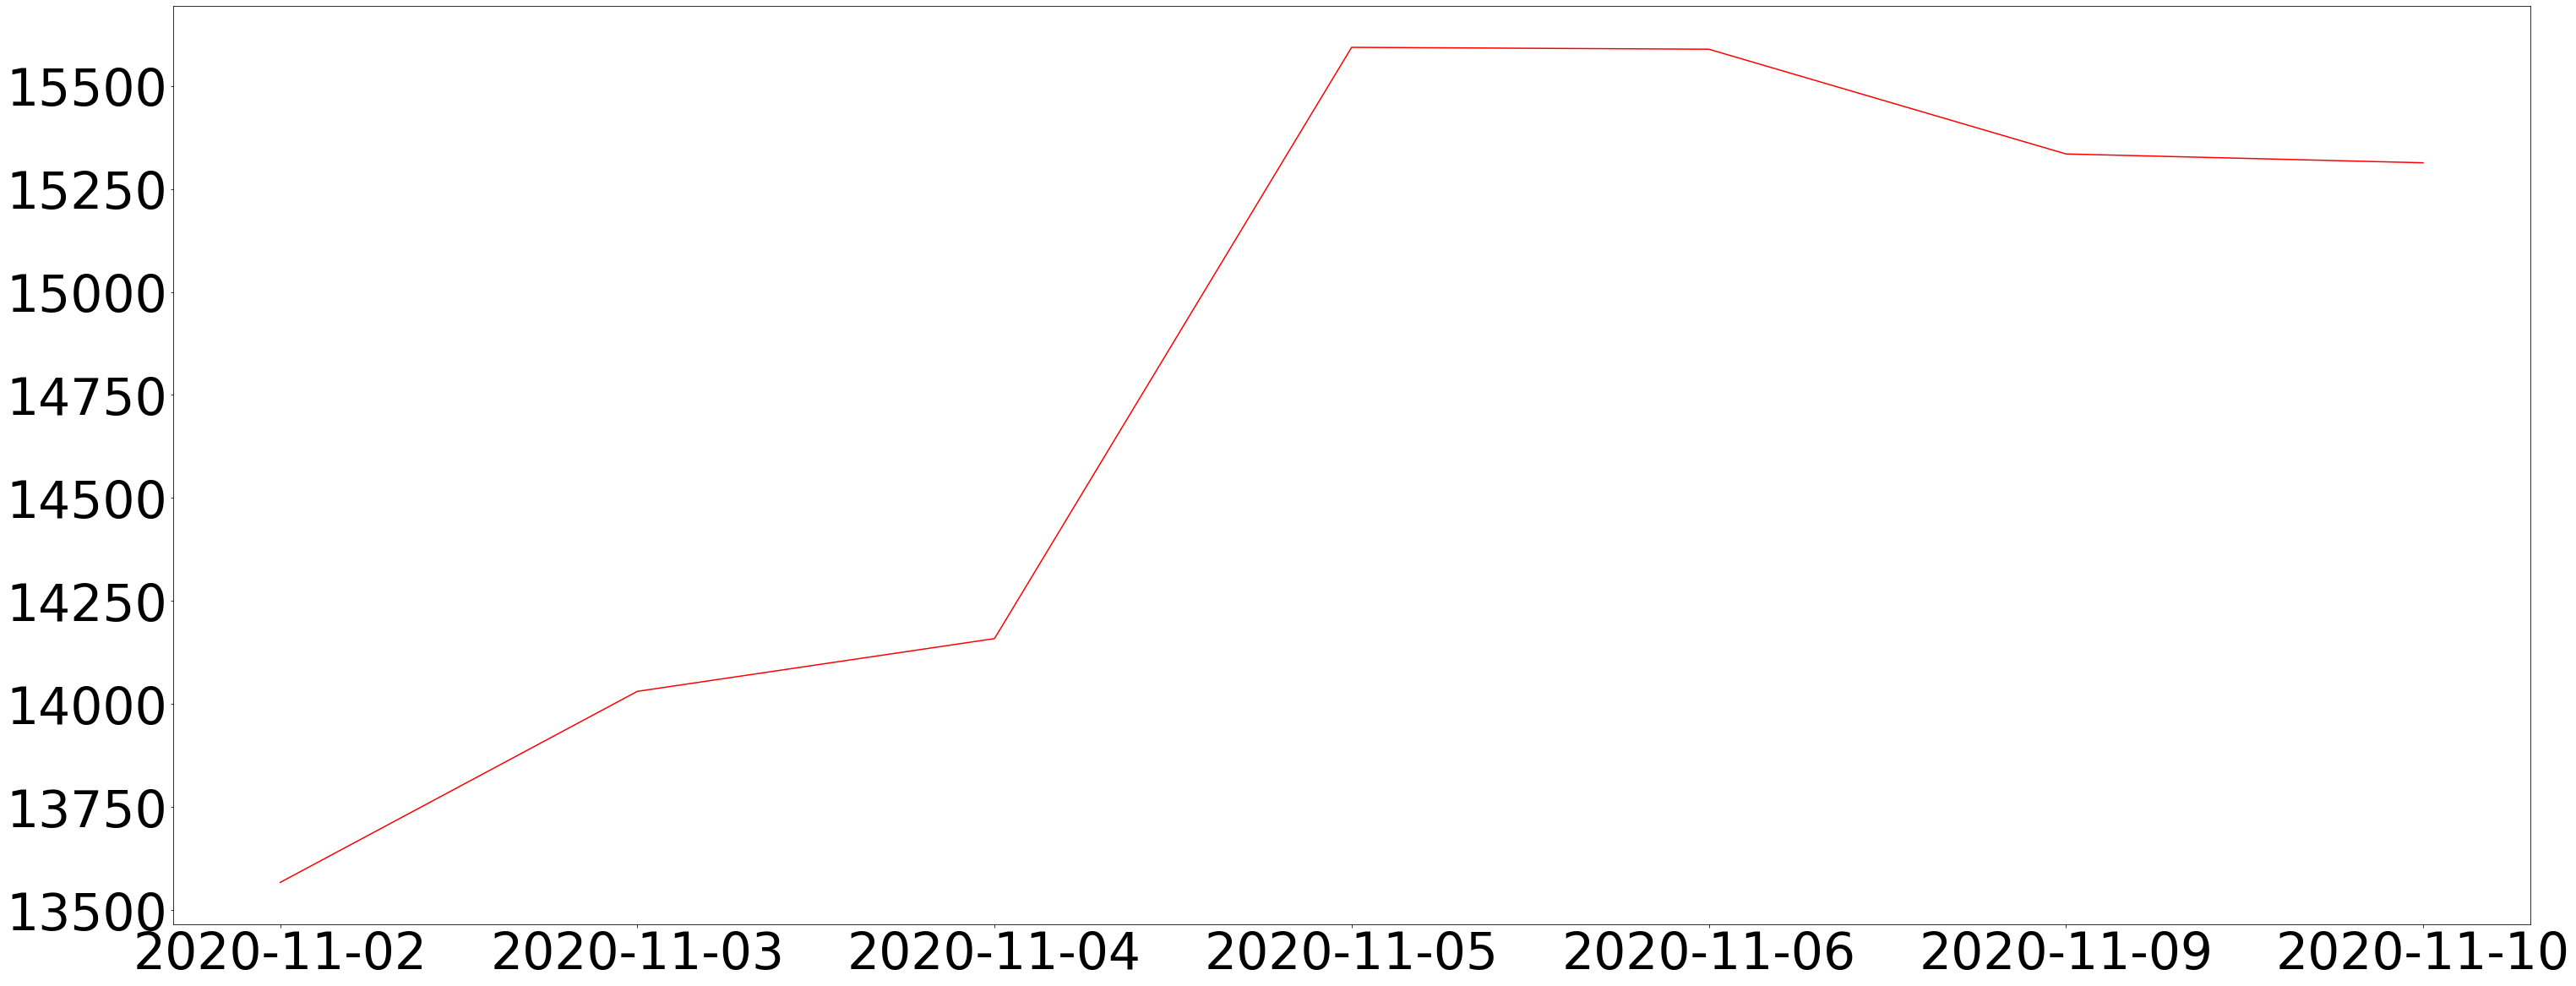

In [66]:
Bitcoin = plt.plot(clean_combined['close date'], clean_combined['Bitcoin Close'], color="red", label="Bitcoin")

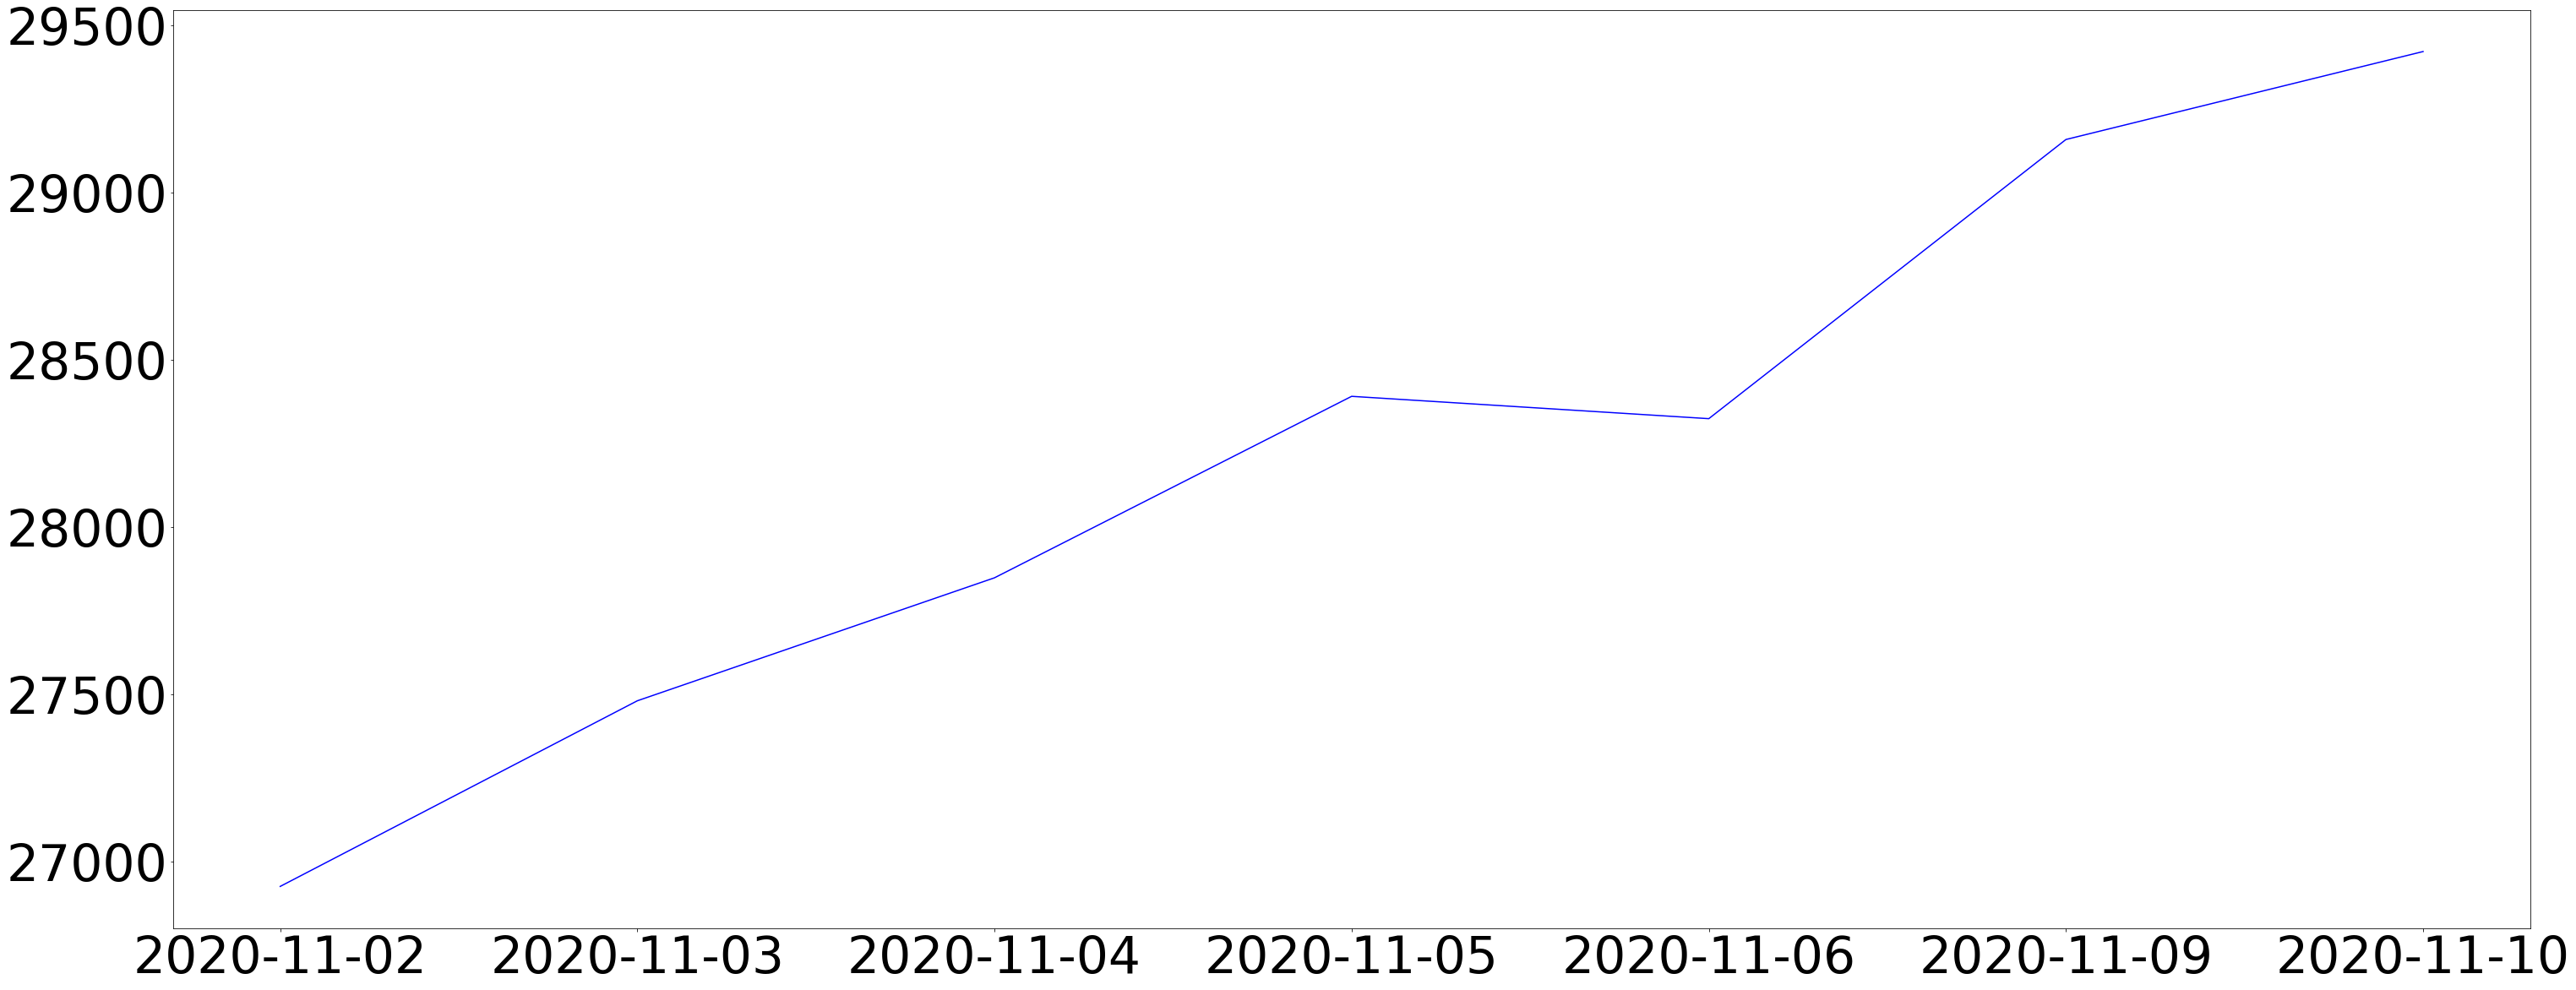

In [67]:
Dow = plt.plot(clean_combined['close date'], clean_combined['DJIA'], color="blue", label="Dow")